,Taxonomic Depth,Biom1 Features,Biom2 Features,Total Unique Features
0,superkingdom,5,5,5
1,kingdom,4,3,3
2,phylum,62,57,48
3,class,83,83,77
4,order,185,183,169
5,family,353,323,287
6,genus,1042,804,587
7,species,791,844,377
8,count,2435,2175,1441
9,all,2525,2302,1553


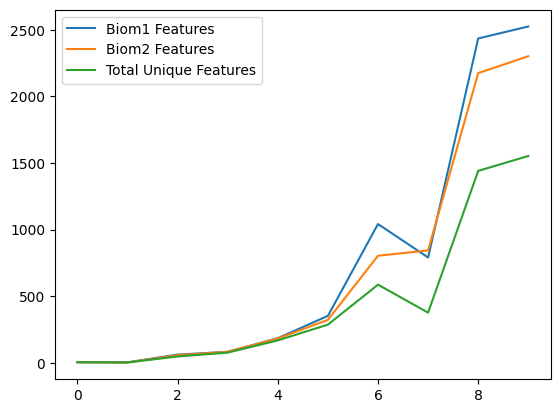

In [9]:
import pandas as pd 
import numpy as np
import os

runName = "run_01"

table = []

for merge in ["superkingdom","kingdom","phylum","class","order","family","genus","species","count","all"]:
    norm  = "RA"
    if(norm == "RA"):
        norm = "RelativeAbundance"
    elif(norm == "RLE"):
        norm = "RLE_Galaxy"
    elif(norm == "TMM"):
        norm = "TMM_Galaxy"
    if(merge == "count"):
        s = "countTable"
    else:
        s = f"mergedOn_{merge}"
    data = []
    data.append(merge)
    dfs= []
    for biom in ["biom1","biom2"]:
        filename = f"{s}_{biom}.tsv_Normalize_{norm}.tsv"
        #print(os.path.exists(f"..\\outputs\\collection\\{runName}\\normalized\\{filename}"))
        df = pd.read_csv(f"..\\outputs\\collection\\{runName}\\normalized\\{filename}",sep="\t")
        dfs.append (df)
        data.append(len(df["#KEY"]))
    bigDf = pd.merge(dfs[0],dfs[1],on="#KEY",how="outer")
    data.append(len(bigDf["#KEY"]))
    table.append(data)

df = pd.DataFrame(table)
df.columns = ["Taxonomic Depth","Biom1 Features","Biom2 Features","Total Unique Features"]
df.plot()
df